In [69]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import h5py
import scipy.io

In [102]:
sal=np.load('sai_切割.npy')
temp=np.load('temp_切割.npy')
das=scipy.io.loadmat('p_2020.mat')
p=np.array(das['p_2020'])

In [103]:
lon=np.arange(120,127.1,0.1)
lat=np.arange(30,40.05,0.1)
Lon,Lat=np.meshgrid(lon,lat)
time=pd.date_range('2020-06-01','2020-08-31',freq='D')
lev=np.arange(0,30,1)
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
def get_cmap_colors(cmap_name, n_colors):
    cmap = plt.get_cmap(cmap_name)
    return [cmap(i/n_colors) for i in range(n_colors)]

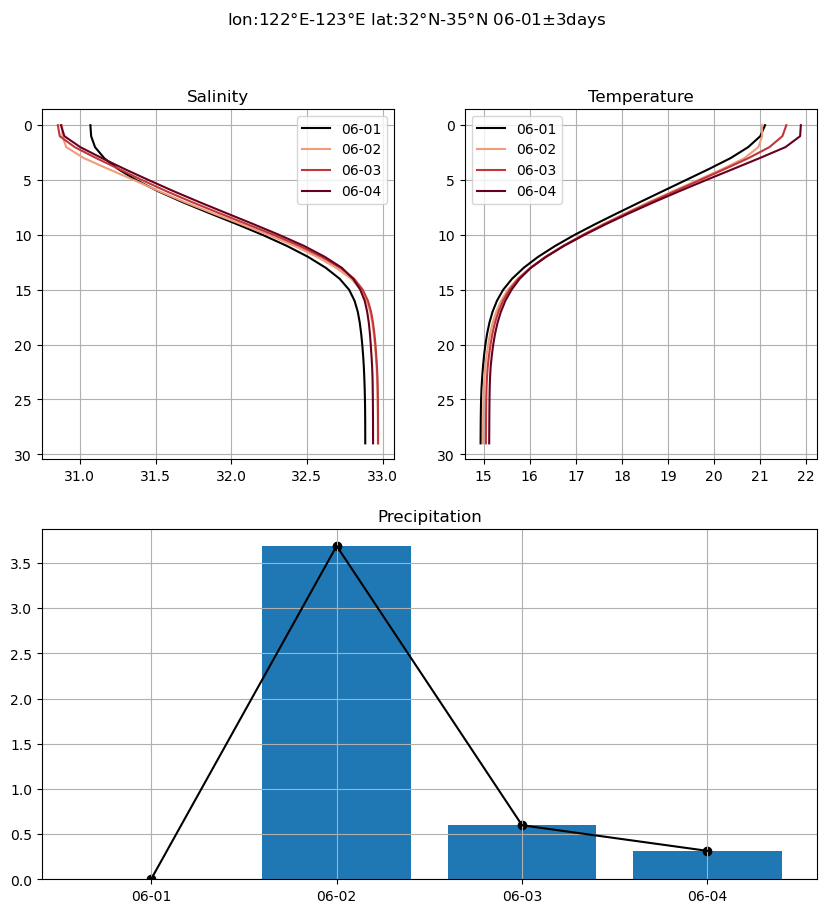

In [151]:
def plot_sea_surface_temperature(left_lon, right_lon, lower_lat, upper_lat, date, daten):
    global lon
    global lat
    global time
    global Lon
    global Lat
    global sal
    global time
    global lev
    
    lonind=(lon>=left_lon)&(lon<=right_lon)
    latind=(lat>=lower_lat)&(lat<=upper_lat)
    timeind=np.where(time==pd.to_datetime(date))[0][0]
    
    timess=np.arange(-1*daten,daten+1,1)+timeind
    timess=timess[(timess>=0)&(timess<len(time)-1)]
    #print(timess)
    rgbs=get_cmap_colors('RdBu',2*daten+1)
    
    plt.figure(figsize=(10,10))
    plt.suptitle(f"lon:{left_lon}°E-{right_lon}°E lat:{lower_lat}°N-{upper_lat}°N {time[timeind].strftime('%m-%d')}$\pm${daten}days")
    plt.subplot(2,2,1)
    plt.title('Salinity')
    for i in timess:
        if i==timeind:
            plt.plot(np.nanmean(sal[:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev,label=time[i].strftime('%m-%d'),color='black')
            continue
        plt.plot(np.nanmean(sal[:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev,label=time[i].strftime('%m-%d'),color=rgbs[daten-i+timeind]) 
    ax=plt.gca()
    ax.invert_yaxis()
    plt.legend()
    plt.grid()
    plt.subplot(2,2,2)
    plt.title('Temperature')
    for i in timess:
        if i==timeind:
            plt.plot(np.nanmean(temp[:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev,label=time[i].strftime('%m-%d'),color='black')
            continue
        plt.plot(np.nanmean(temp[:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev,label=time[i].strftime('%m-%d'),color=rgbs[daten-i+timeind]) 
    ax=plt.gca()
    ax.invert_yaxis()
    plt.legend()
    plt.grid()
    plt.subplot(2,2,(3,4))
    plt.title('Precipitation')
    #print(np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)))
    plt.bar(time[timess].strftime('%m-%d'),np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)))
    plt.scatter(time[timess].strftime('%m-%d'),np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)),color='black')
    plt.plot(time[timess].strftime('%m-%d'),np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)),color='black')
    plt.grid()
    #ax=plt.gca()
    #ax.set_position([0.125, 0.21, 0.82, 0.23])
    #print(ax.get_position())
    #print(np.nanmean(sal[:,lonind,:,:][:,:,latind,:][:,:,:,timeind],axis=(1,2)).shape)
    
plot_sea_surface_temperature(122, 123, 32, 35, '20200601',3)